<a href="https://colab.research.google.com/github/bernardlawes/Model-Training-Notebooks/blob/main/YOLO11s_Custom_Ship_Detect_Class_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Set API Keys

In [1]:
from google.colab import userdata
MY_SECRET_KEY=userdata.get('ROBOFLOW_API_KEY')

# Install Requried Libraries

In [ ]:
!pip install ultralytics
!pip install roboflow

# Import Required Libraries


In [ ]:
import ultralytics
from roboflow import Roboflow
from ultralytics import YOLO
from IPython.display import Image

# Download Labeled Dataset (from Roboflow)

In [ ]:
rf = Roboflow(api_key=MY_SECRET_KEY)
project = rf.workspace("shipclassification").project("shipclassification")
version = project.version(4)
dataset = version.download("yolov11")

# Train the YOLO Model with the Dataset


In [ ]:
!yolo task=detect mode=train model=yolo11n.pt data=/content/ShipClassification-4/data.yaml epochs=80 imgsz=416 plots=True

# VIEW MODEL TRANING CHARTS

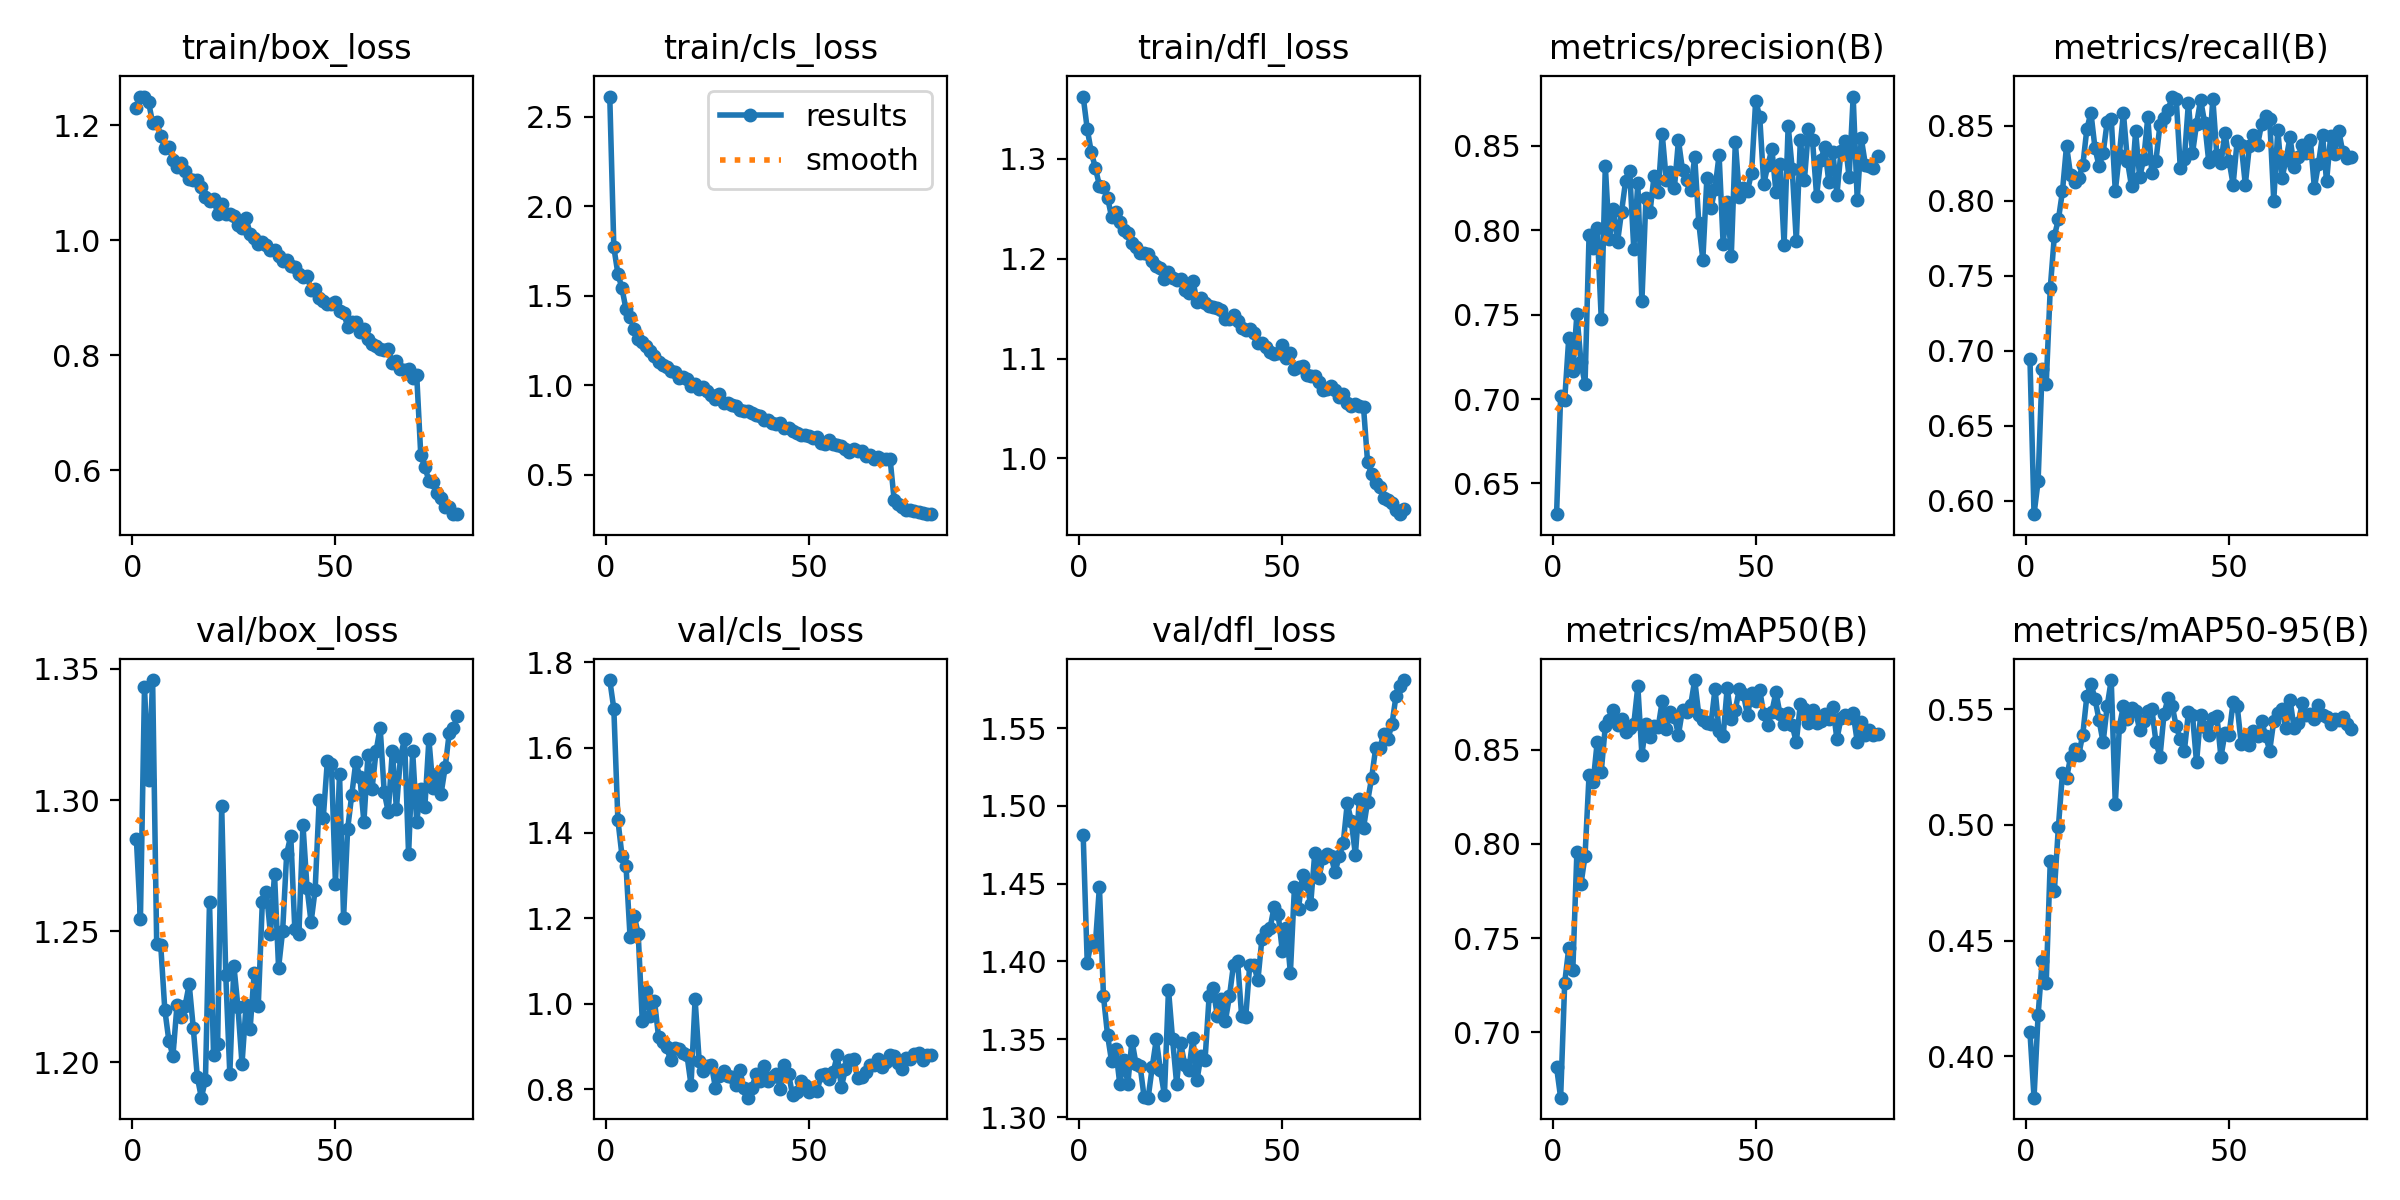

In [11]:
Image(filename=f'/content/runs/detect/train2/results.png', width=600)

# Evalute the Model / Validation

In [12]:
!yolo task=detect mode=val model=/content/runs/detect/train2/weights/best.pt data=/content/ShipClassification-4/data.yaml

Ultralytics 8.3.75 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
YOLO11n summary (fused): 238 layers, 2,583,127 parameters, 0 gradients, 6.3 GFLOPs
val: Scanning /content/ShipClassification-4/valid/labels.cache... 339 images, 5 backgrounds, 0 corrupt: 100% 339/339 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 22/22 [00:02<00:00,  9.13it/s]
                   all        339        371      0.808      0.874      0.883      0.561
        Container Ship         86         86      0.816      0.872      0.936      0.614
           Cruise Ship         32         64      0.861      0.868      0.936      0.586
         Military Ship         73         74      0.772      0.946      0.925      0.543
                  RORO         62         62      0.876      0.968      0.907      0.646
                Tanker         85         85      0.717      0.718      0.713      0.417
Speed: 0.3ms preprocess, 1.5ms inference